공부 시간, 과외 시간과 성적 사이의 관계는 좌표로 나타낼 때 형태가 직선으로 해결되는 선형 회귀를 사용하기에 적합했었다.  
공부 시간에 따른 점수가 아닌 합격 여부로 발표되는 시험이 있을 경우 직선으로 해결하기에는 적합하지 못한 문제가 발생된다.  
이럴 때 사용하는 로지스틱 회귀는 참과 거짓 중에 하나를 내놓는 과정으로 참과 거짓을 구분한 'S'자를 눕혀놓은 형태의 선을 그어주는 작업이다.  
***
참조 사이트  
http://taewan.kim/post/sigmoid_diff/  
https://devlog.jwgo.kr/2018/04/16/sigmoid-graph-according-to-slope-change/

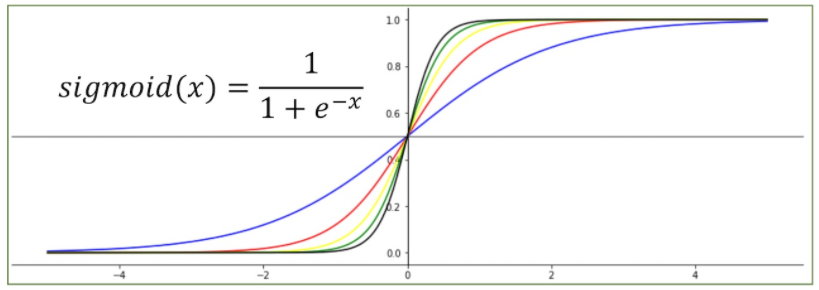

In [3]:
from IPython.display import Image
Image('./numpyImages/sigmoid.png', width=800)

In [4]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [5]:
# 공부 시간(x), 합격 여부(y) => [공부 시간, 합격 여부]
data = [[2, 0], [4, 0], [6, 0], [8, 1], [10, 1], [12, 1], [14, 1]]
xData = [i[0] for i in data]
yData = [i[1] for i in data]
print(xData)
print(yData)

[2, 4, 6, 8, 10, 12, 14]
[0, 0, 0, 1, 1, 1, 1]


In [20]:
# 기울기(a), y절편(b) 값을 랜덤한 값으로 정한다.
# random_normal() 함수는 tensorflow에서 정규 분포를 따르는 난수를 발생시킨다.
a = tf.Variable(tf.random_normal([1], dtype=tf.float64))
b = tf.Variable(tf.random_normal([1], dtype=tf.float64))
sess = tf.Session()
sess.run(tf.global_variables_initializer())
print('a = {}, b = {}'.format(sess.run(a), sess.run(b)))

a = [-1.69317108], b = [-0.12107345]


시그모이드 방정식

In [22]:
# np.e: 넘퍼이에서 지수 값(2.718281828459045)을 의미하는 상수
# print(np.e)
# https://icim.nims.re.kr/post/easyMath/64 참조
y = 1 / (1 + np.e ** -(a * xData + b))

시그모이드 방정식의 오차를 계산하는 함수를 만든다.  
시그모이드 함수의 특성은 예측값(y)이 항상 0 아니면 1이라는 것이다.

In [23]:
loss = -tf.reduce_mean(np.array(yData) * tf.log(y) + (1 - np.array(yData)) * tf.log(1 - y))

오차를 최소로 하는 값을 찾는다.

In [24]:
gradient_descent = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

학습시킨다.

In [30]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(320001):
    sess.run(gradient_descent)
    if i % 20000 == 0:
        print('Epoch: {0:6d}, loss: {1:10.6f}, 기울기: {2:10.6f}, y절편: {3:10.6f}'.format(i, sess.run(loss), sess.run(a)[0],
                                                                                     sess.run(b)[0]))

Epoch:      0, loss:   0.647969, 기울기:   0.146565, y절편:   0.449439
Epoch:  20000, loss:   0.021762, 기울기:   2.554004, y절편: -17.724151
Epoch:  40000, loss:   0.011861, 기울기:   3.173085, y절편: -22.064210
Epoch:  60000, loss:   0.008121, 기울기:   3.557335, y절편: -24.756144
Epoch:  80000, loss:   0.006164, 기울기:   3.836139, y절편: -26.708860
Epoch: 100000, loss:   0.004962, 기울기:   4.054845, y절편: -28.240446
Epoch: 120000, loss:   0.004151, 기울기:   4.234714, y절편: -29.499961
Epoch: 140000, loss:   0.003566, 기울기:   4.387426, y절편: -30.569253
Epoch: 160000, loss:   0.003125, 기울기:   4.520085, y절편: -31.498097
Epoch: 180000, loss:   0.002781, 기울기:   4.637333, y절편: -32.319010
Epoch: 200000, loss:   0.002505, 기울기:   4.742369, y절편: -33.054400
Epoch: 220000, loss:   0.002279, 기울기:   4.837490, y절편: -33.720362
Epoch: 240000, loss:   0.002090, 기울기:   4.924402, y절편: -34.328843
Epoch: 260000, loss:   0.001929, 기울기:   5.004406, y절편: -34.888956
Epoch: 280000, loss:   0.001792, 기울기:   5.078518, y절편: -35.407806
Epoch: 300